In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

# Load dataset
dataset = tf.keras.utils.image_dataset_from_directory('cell_images')


Found 27558 files belonging to 2 classes.


In [7]:
# Scaling the dataset
scaled_dataset = dataset.map(lambda x, y: (x/255, y))

In [8]:
scaled_itrt = scaled_dataset.as_numpy_iterator()

In [9]:
batch = scaled_itrt.next()

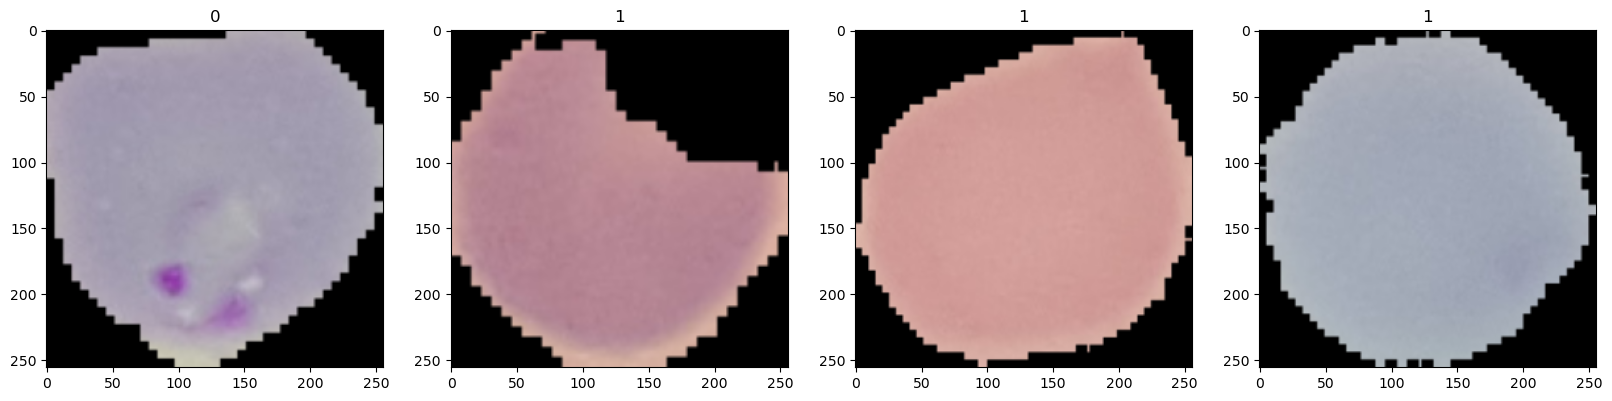

In [11]:
# This will tell us which class, 0 or 1, is for Parasitized or Uninfected
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

# Labels will be the index, Images the key
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])
    
# We get to see 0 is for Parasitized, 1 is for  Uninfected

In [12]:
# Split dataset into train, validation, and test sets
batch_number = len(scaled_dataset)

In [13]:
print(batch_number)

862


In [14]:

# The model learns from the patterns and relationships present in the training data
train_size = int((0.7 * batch_number))

# After each training epoch or iteration, the model's performance is evaluated on the validation set to monitor for overfitting and determine the optimal hyperparameters
val_size = int((0.2 * batch_number))

# completely independent subset of the dataset, not used during training or hyperparameter tuning.
# The test set provides an unbiased estimate of the model's performance on unseen data.
test_size = int((0.1 * batch_number))


In [15]:
print('train_size: ', train_size)
print('val_size: ', val_size)
print('test_size: ', test_size)

train_size:  603
val_size:  172
test_size:  86


In [16]:

train_dataset = scaled_dataset.take(train_size)
val_dataset = scaled_dataset.skip(train_size).take(val_size)
test_dataset = scaled_dataset.skip(train_size + val_size).take(test_size)


In [17]:

# Data augmentation, given the nature of medical imaging
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

# Build model
model = Sequential([
    data_augmentation,
    Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5), 
    Dense(1, activation='sigmoid')
])



c:\Users\Bildad Otieno\anaconda3\envs\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [12]:

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [13]:
# Train model
history = model.fit(train_dataset, epochs=20, validation_data=val_dataset, callbacks=[early_stopping])

Epoch 1/20


603/603 ━━━━━━━━━━━━━━━━━━━━ 623s 1s/step - accuracy: 0.7459 - loss: 0.6216 - val_accuracy: 0.9366 - val_loss: 0.3578
Epoch 2/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 451s 748ms/step - accuracy: 0.9062 - loss: 0.4320 - val_accuracy: 0.9330 - val_loss: 0.3072
Epoch 3/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 508s 843ms/step - accuracy: 0.9194 - loss: 0.3651 - val_accuracy: 0.9339 - val_loss: 0.2834
Epoch 4/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 761s 1s/step - accuracy: 0.9190 - loss: 0.3337 - val_accuracy: 0.9364 - val_loss: 0.2778
Epoch 5/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 851s 1s/step - accuracy: 0.9248 - loss: 0.3108 - val_accuracy: 0.9377 - val_loss: 0.2671
Epoch 6/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 530s 878ms/step - accuracy: 0.9275 - loss: 0.2921 - val_accuracy: 0.9428 - val_loss: 0.2532
Epoch 7/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 711s 1s/step - accuracy: 0.9271 - loss: 0.2820 - val_accuracy: 0.9500 - val_loss: 0.2420
Epoch 8/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 567s 887ms/step - accuracy: 0.9395 - loss: 0.2713 - val_acc

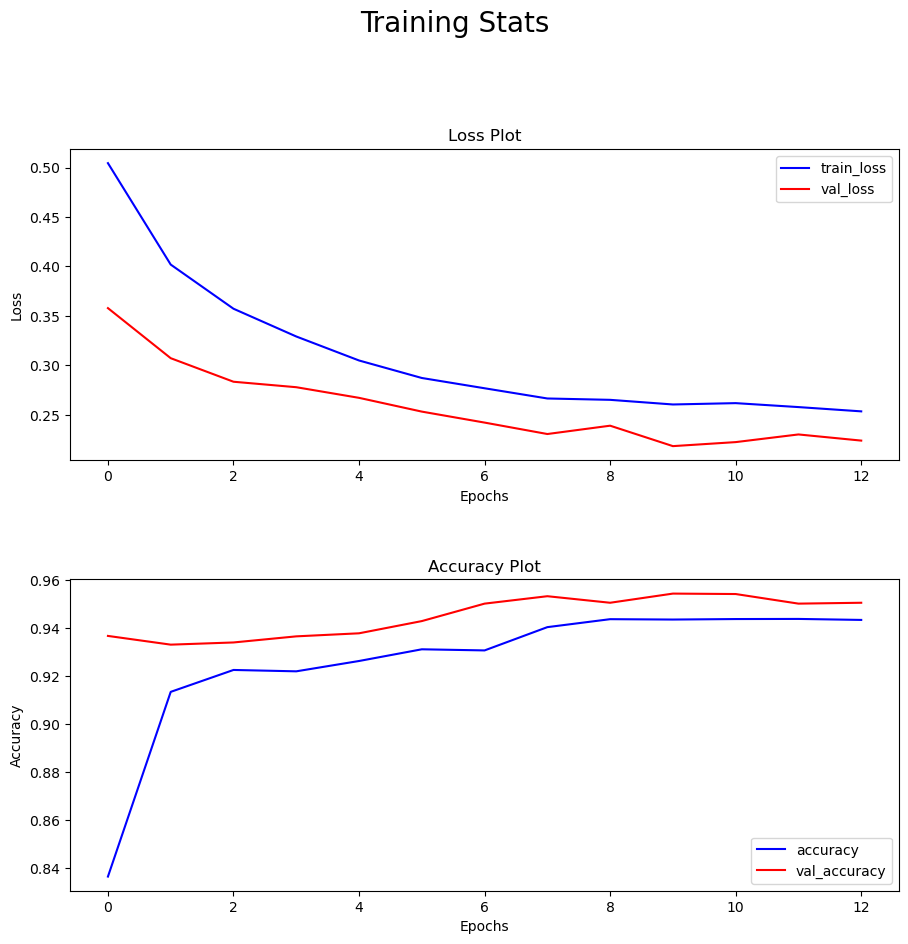

In [37]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1, figsize=(10,10))
ax[0].plot(history.history['loss'], color='blue', label="train_loss")
ax[0].plot(history.history['val_loss'], color='red', label="val_loss")
ax[0].set(
    title = "Loss Plot",
    xlabel ="Epochs",
    ylabel = "Loss"
)
ax[0].legend(loc = "upper right")

ax[1].plot(history.history['accuracy'], color='blue', label="accuracy")
ax[1].plot(history.history['val_accuracy'], color='red', label="val_accuracy")
ax[1].set(
    title = "Accuracy Plot",
    xlabel ="Epochs",
    ylabel = "Accuracy"    
)
ax[1].legend(loc = "lower right")
fig.suptitle('Training Stats', fontsize = 20)
fig.tight_layout(pad=4)

plt.show()

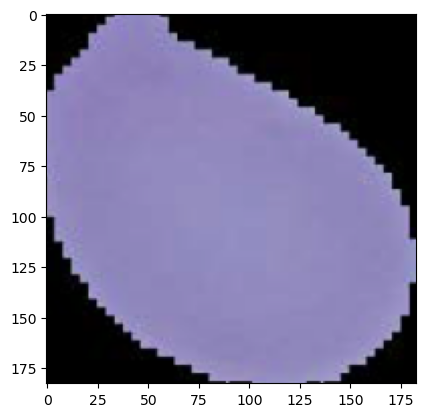

In [20]:
img = cv.imread(r'c:\Users\Bildad Otieno\Documents\Billy_Repo\CEMA_task\cell_images\test2.PNG')
plt.imshow(img)
plt.show()

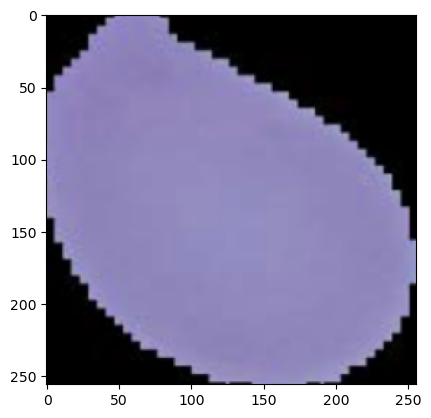

In [21]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [24]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [25]:
# Display predictions
if yhat[0] > 0.5:
    print("Predicted: Uninfected")
else:
    print("Predicted: Parasitized")

Predicted: Uninfected
